In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis, skew
import warnings
import pickle
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style="ticks", color_codes=True)


# Importing Data

In [2]:
#Reading train and test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test_toup.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,140,60,RL,65.0,15426,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,231500
1,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
2,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,260000
3,143,50,RL,71.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,166000
4,144,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,204000


In [4]:
print(train.shape)
print(test.shape)

(1321, 81)
(139, 80)


In [5]:
#Removing the id of the data
train_Id = train['Id']
test_Id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

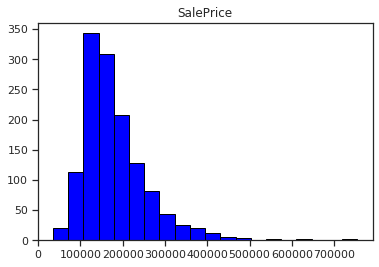

In [6]:
#plotting the target variable to see its distribution
y = train['SalePrice']
plt.title('SalePrice')

plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()


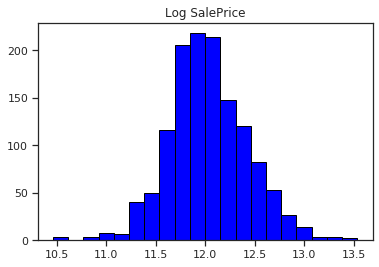

In [7]:
#normalize target variable
y = np.log1p(y)
plt.title('Log SalePrice')
plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()

In [8]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [9]:
train['SalePrice'].head()

0    12.352339
1    11.652696
2    12.468441
3    12.019749
4    12.225880
Name: SalePrice, dtype: float64

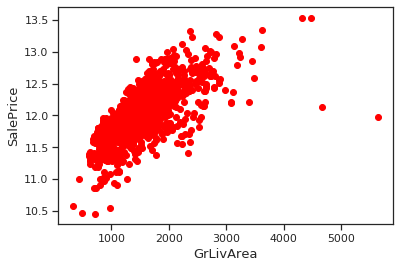

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], color = "red")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [11]:
#Removing the outlier
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

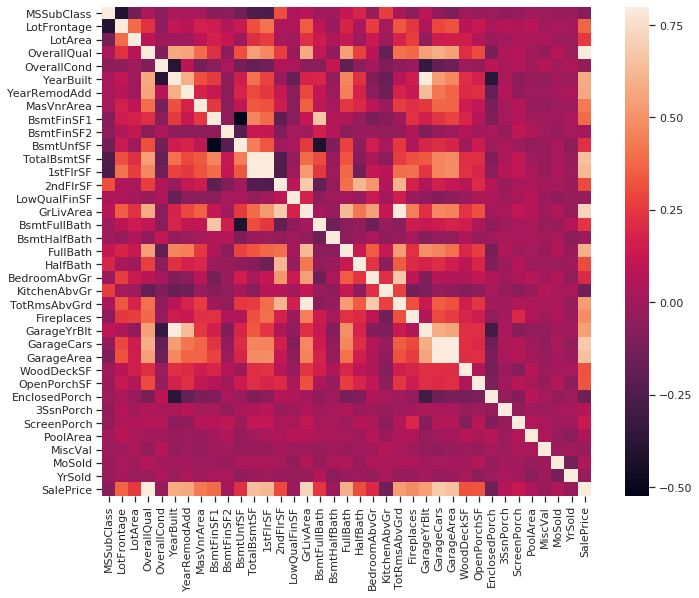

In [12]:
#Plotting the correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})


all_data size is : (1456, 79)


In [14]:
ntrain

1317

# Filling Missing Values :

# Steps we will take :
## Find Correlation between columns with missing values and Target label and fill accordingly
## Find positively correlated features and create new features out of those.

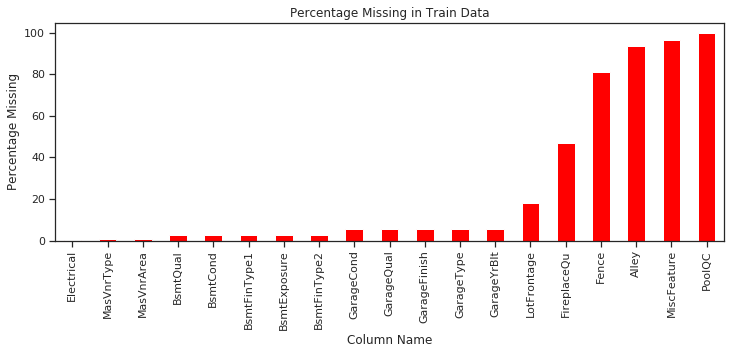

In [15]:
#missingness in train

missing_train = train.isnull().sum()/len(train.index)*100
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")

missing_train.plot.bar(width= .5,color = "red",figsize =(12,4))

In [16]:
#how many columns missing info
len(missing_train)

19

Text(0.5, 1.0, 'Percentage Missing in Train Data')

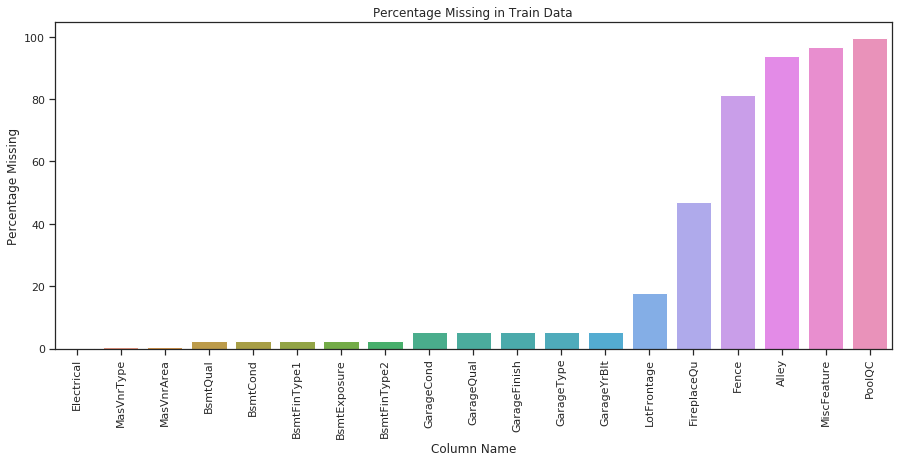

In [17]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_train.index, y =missing_train)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")

Text(0.5, 1.0, 'Percentage Missing in Test Data')

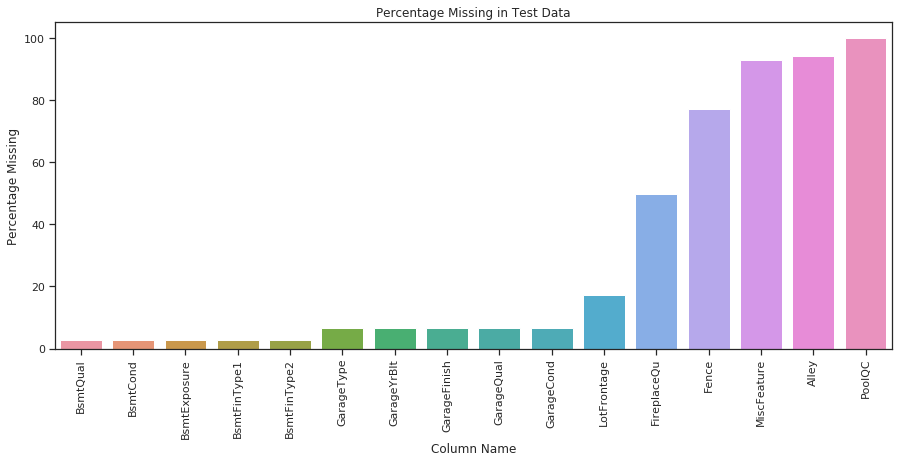

In [18]:
#missingness in train

missing_test = test.isnull().sum()/len(test.index)*100
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_test.index, y =missing_test)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Test Data")

In [19]:
#how many columns missing info
len(missing_test)

16

# Dealing with the missing values 

#  (1)PoolQC

### Number of null values are about the same as total number of rows. So we assume SalesPrice to be independent of this.

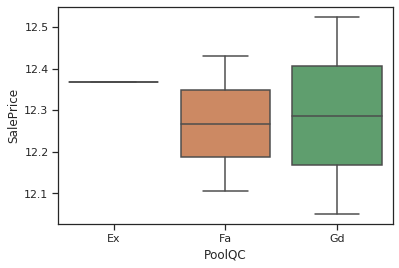

In [20]:
sns.boxplot(x='PoolQC',y='SalePrice',data=train)

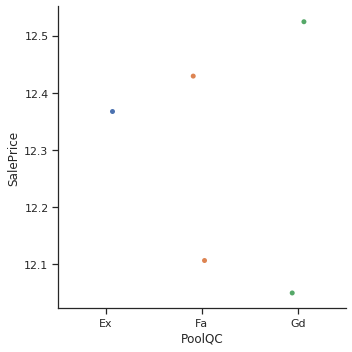

In [21]:
sns.catplot(x="PoolQC", y="SalePrice", data=train);

In [22]:
all_data['PoolQC'].value_counts()

Fa    2
Gd    2
Ex    1
Name: PoolQC, dtype: int64

In [23]:
all_data['PoolQC'].value_counts()
all_data.drop("PoolQC", axis=1, inplace=True)

In [24]:
len(train.columns)

80

In [25]:
all_data.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,928,836,0,NaN,3,1Fam,TA,No,821,0,...,WD,0,Pave,7,928,AllPub,276,1997,1997,2009
1,864,0,0,NaN,3,1Fam,TA,No,432,0,...,ConLI,0,Pave,5,864,AllPub,0,1971,1971,2010
2,1734,0,0,NaN,3,1Fam,TA,Av,1300,0,...,WD,0,Pave,7,1734,AllPub,160,2005,2005,2006
3,910,475,0,NaN,4,1Fam,TA,No,507,0,...,WD,0,Pave,6,910,AllPub,0,1952,1952,2010
4,1501,0,0,NaN,3,1Fam,TA,Gd,679,0,...,WD,0,Pave,6,1490,AllPub,144,1999,1999,2009


# (2)MiscFeature

In [26]:
all_data['MiscFeature'].shape[0]
all_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

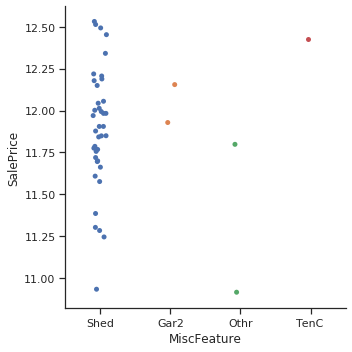

In [27]:
sns.catplot(x="MiscFeature", y="SalePrice", data=train);

In [28]:
#Number of Missing values in MiscFeature
all_data.MiscFeature.isna().sum()  #  1404 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["MiscFeature"] = all_data['MiscFeature'].fillna("None")
all_data['MiscFeature'] = pd.Categorical(all_data['MiscFeature'])

all_data.MiscFeature = all_data.MiscFeature.astype('category')


# (2) Finding probabilities of each occurance 
print("Before filling :")
print(all_data['MiscFeature'].value_counts())



MiscFeature_probabilities = [0.963013698,0.033561643,0.00136986,0.00136986,0.000684931]

MiscFeature_Values = ['None','Shed','Othr','Gar2','TenC']


#replacing only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['MiscFeature'] == 'None'].index


#Find the column index so as to use 'iloc'   . 56 is the col
np.argwhere(all_data.columns == 'MiscFeature')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,56] = np.random.choice(MiscFeature_Values,len(indices),p=MiscFeature_probabilities)




Before filling :
None    1402
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


In [29]:
print("After filling values using probability distribution")
all_data['MiscFeature'].value_counts()

After filling values using probability distribution


None    1362
Shed      86
Gar2       4
TenC       2
Othr       2
Name: MiscFeature, dtype: int64

# (3)Alley  

In [30]:
all_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

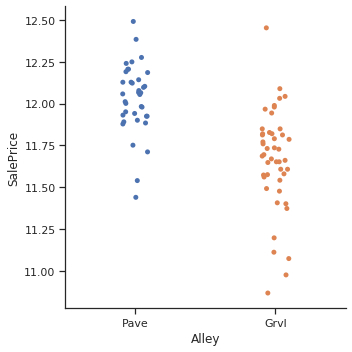

In [31]:
sns.catplot(x="Alley", y="SalePrice", data=train);

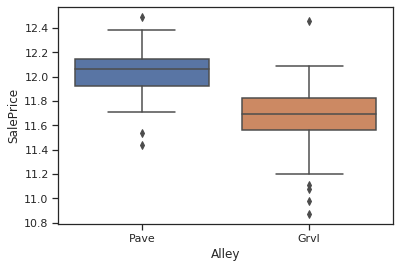

In [32]:
sns.boxplot(x='Alley',y='SalePrice',data=train);

In [33]:
#Number of Missing values in Alley
all_data['Alley'].isna().sum()  #  1367 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["Alley"] = all_data['Alley'].fillna("None")
all_data['Alley'] = pd.Categorical(all_data['Alley'])



# (2) Finding probabilities of each occurance 

print("Before filling :")
print(all_data['Alley'].value_counts())



Alley_probabilities = [0.937671232,0.034246575,0.028082191]

Alleyy_Values = ['None','Grvl','Pave']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['Alley'] == 'None'].index


#Find the column index so as to use 'iloc'   . 3 is the col
np.argwhere(all_data.columns == 'Alley')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,3] = np.random.choice(Alleyy_Values,len(indices),p=Alley_probabilities)

Before filling :
None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [34]:
print("After filling values using probability distribution")
all_data['Alley'].value_counts()

After filling values using probability distribution


None    1286
Grvl      99
Pave      71
Name: Alley, dtype: int64

#  (4) Fence

In [35]:
all_data['Fence'].value_counts()

MnPrv    156
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

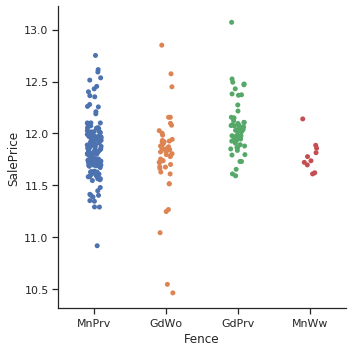

In [36]:
sns.catplot(x='Fence',y='SalePrice',data=train)

In [37]:
#Number of Missing values in Alley
all_data['Fence'].isna().sum()  #  1177 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["Fence"] = all_data['Fence'].fillna("None")
all_data['Fence'] = pd.Categorical(all_data['Fence'])


 
# (2) Finding probabilities of each occurance 

print("Before filling :")
print(all_data['Fence'].value_counts())



Fence_probabilities = [0.807534246,0.107534246,0.040410958,0.036986301,0.007534246]

Fence_Values = ['None','MnPrv','GdPrv','GdWo','MnWw']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['Fence'] == 'None'].index


#Find the column index so as to use 'iloc'   . 25 is the col
np.argwhere(all_data.columns == 'Fence')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,25] = np.random.choice(Fence_Values,len(indices),p=Fence_probabilities)



Before filling :
None     1176
MnPrv     156
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [38]:
print("After filling values using probability distribution")
all_data['Fence'].value_counts()

After filling values using probability distribution


None     933
MnPrv    306
GdPrv     99
GdWo      96
MnWw      22
Name: Fence, dtype: int64

# (5) FirePlace

In [39]:
all_data['FireplaceQu'].value_counts()

Gd    378
TA    312
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

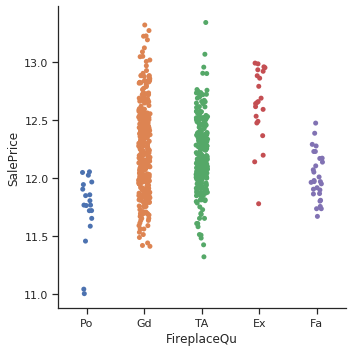

In [40]:
sns.catplot(x='FireplaceQu',y='SalePrice',data=train)

In [41]:
np.argwhere(all_data.columns == 'FireplaceQu')

array([[26]])

In [42]:
#Number of Missing values in FireplaceQu
all_data['FireplaceQu'].isna().sum()  #  690 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["FireplaceQu"] = all_data['FireplaceQu'].fillna("None")
all_data['FireplaceQu'] = pd.Categorical(all_data['FireplaceQu'])



# (2) Finding probabilities of each occurance 
print("Before filling :")
print(all_data['FireplaceQu'].value_counts())


FireplaceQu_probabilities = [0.472602739,0.260273972,0.214383561,0.022602739,0.016438356,0.013698630]

FireplaceQu_Values = ['None','Gd','TA','Fa','Ex','Po']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['FireplaceQu'] == 'None'].index


#Find the column index so as to use 'iloc'   . 26 is the col
np.argwhere(all_data.columns == 'FireplaceQu')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,26] = np.random.choice(FireplaceQu_Values,len(indices),p=FireplaceQu_probabilities)



Before filling :
None    690
Gd      378
TA      312
Fa       33
Ex       23
Po       20
Name: FireplaceQu, dtype: int64


In [43]:
print("After filling :")
all_data['FireplaceQu'].value_counts()

After filling :


Gd      553
TA      470
None    318
Fa       44
Ex       37
Po       34
Name: FireplaceQu, dtype: int64

# (6) LotFrontage

In [44]:

lotFrontage_df = all_data[['Neighborhood','LotFrontage']].copy()
groupby_Neighborhood = lotFrontage_df.groupby('Neighborhood')

indices = all_data[all_data['LotFrontage'].isna()].index


mean_Neighborhood = groupby_Neighborhood.mean()
mean_Neighborhood.head()


for i in indices:    
    locality = all_data.iloc[i,59]      
    value = mean_Neighborhood.get_value(locality,'LotFrontage')     
    all_data.iloc[i,49] = value
   

# (6)GarageYrBlt (7) GarageArea (8) GarageCar

In [45]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# (9)GarageType (10) GarageFinish (11) GarageQual (12)GarageCond

In [46]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [47]:
#Finding Remaining columns which have any null values
all_data.columns[all_data.isnull().any()].tolist()

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'MasVnrArea',
 'MasVnrType']

In [48]:
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
0,TA,No,GLQ,Unf,Gd
1,TA,No,ALQ,Unf,TA
2,TA,Av,GLQ,Unf,Gd
3,TA,No,Rec,Unf,TA
4,TA,Gd,GLQ,Unf,Gd


In [49]:
indices = all_data[all_data['BsmtCond'].isna()].index
print(all_data.iloc[indices][['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].head())

'''

cols = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']''''''
 When Either of cols is NaN , all the remaining columns in cols are also NaN.
Meaning when a basement doesnt exist, other values also dont exist
We can directly replace NaN with None

'''

    BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual
17       NaN          NaN          NaN          NaN      NaN
43       NaN          NaN          NaN          NaN      NaN
120      NaN          NaN          NaN          NaN      NaN
203      NaN          NaN          NaN          NaN      NaN
223      NaN          NaN          NaN          NaN      NaN


"\n\ncols = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']\n When Either of cols is NaN , all the remaining columns in cols are also NaN.\nMeaning when a basement doesnt exist, other values also dont exist\nWe can directly replace NaN with None\n\n"

In [50]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [51]:
for col in ('BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual'):
    all_data[col] = all_data[col].fillna('None')

In [52]:
#Remaining Cols:
all_data.columns[all_data.isnull().any()].tolist()

['Electrical', 'MasVnrArea', 'MasVnrType']

In [53]:
indices = all_data[all_data['Electrical'].isna()].index
indices

#Electrical has only 1 Null value , hence replacing by most frequently occuring value i.e. mode of the column
all_data['Electrical'].isna().sum()


1

In [54]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


#Similarly for Exterior1st, Exterior2nd,SaleType and KitchenQual
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])



  # 'MasVnrArea','MasVnrType'

In [55]:
all_data[['MasVnrArea','MasVnrType']]
indices = all_data[all_data['MasVnrArea'] == 0].index
len(indices)

860

In [56]:
len(all_data.iloc[indices]['MasVnrType'])
# When MasVnrArea is 0 then MasVnrType is None
#Hence we will fill null values with correspondingly

860

In [57]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [58]:
all_data['Utilities'].value_counts()
# Only 1 value is 'NoSewa' and that value is in training set only and not in test set.
#Removing this col as it will not help in predicting the output


all_data = all_data.drop(['Utilities'], axis=1)



### Other Cols

In [59]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

# No remaining cols with missing values


In [60]:
all_data.columns[all_data.isnull().any()].tolist()

[]

In [61]:
train[:10]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,15426,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,12.352339
1,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,11.652696
2,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,12.468441
3,50,RL,71.0,8520,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,12.019749
4,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.225880
5,90,RM,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,ConLI,Abnorml,11.736077
6,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.775297
7,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,11.561725
8,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,12.312687
9,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,11.856522


In [62]:
# MSSubClass is categorical as only a certain set of numbers are appearing. Hence converting it to categorical


all_data['MSSubClass'].unique()

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)



In [63]:
# OverallCond is categorical as only a certain set of numbers are appearing. Hence converting it to categorical


all_data['OverallCond'].unique()

all_data['OverallCond'] = all_data['OverallCond'].apply(str)

In [64]:
#Unlike Yrbuilt , YrSold is taking only a set of numbers converting it to categorical.
all_data['YrSold'].unique()


all_data['YrSold'] = all_data['YrSold'].astype(str)

all_data['MoSold'].unique()


all_data['MoSold'] = all_data['MoSold'].astype(str)

In [65]:

#columns which have categorical values
#(converting them to numerical as linear regression works only on numerical features)

columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for column in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[column].values)) 
    all_data[column] = lbl.transform(list(all_data[column].values))

In [66]:
# This will map the labels of categorical data to 0,1,2,3 etc.
all_data = pd.get_dummies(all_data)

In [67]:
all_data.to_csv('./actual.csv')

In [68]:
# As total square feet is important. Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [69]:
#checking the correlation of features with the target variable
corrmat["SalePrice"].sort_values(ascending=False)[1:9]

OverallQual    0.820155
GrLivArea      0.718499
GarageCars     0.681676
GarageArea     0.654091
TotalBsmtSF    0.645197
1stFlrSF       0.622147
FullBath       0.593939
YearBuilt      0.580423
Name: SalePrice, dtype: float64

These features are positively correlated with the salePrice hence creating new features by 
taking 3 polynomials square, cube and square root 


In [70]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#OverallQual    0.820155
#GrLivArea      0.718499
#GarageCars     0.681676
#GarageArea     0.654091
#TotalBsmtSF    0.645197
#1stFlrSF       0.622147
#FullBath       0.593939
#YearBuilt      0.580423
      

def positiveCorrelatedFeatures():
    all_data["OverallQual-s2"] = all_data["OverallQual"] ** 2
    all_data["OverallQual-s3"] = all_data["OverallQual"] ** 3
    all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
    
    all_data["GrLivArea-s2"] = all_data["GrLivArea"] ** 2
    all_data["GrLivArea-s3"] = all_data["GrLivArea"] ** 3
    all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
    
    all_data["GarageCars-s2"] = all_data["GarageCars"] ** 2
    all_data["GarageCars-s3"] = all_data["GarageCars"] ** 3
    all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
    
    
    all_data["GarageArea-s2"] = all_data["GarageArea"] ** 2
    all_data["GarageArea-s3"] = all_data["GarageArea"] ** 3
    all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
    
    
    all_data["TotalBsmtSF-s2"] = all_data["TotalBsmtSF"] ** 2
    all_data["TotalBsmtSF-s3"] = all_data["TotalBsmtSF"] ** 3
    all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
    
    
    all_data["1stFlrSF-s2"] = all_data["1stFlrSF"] ** 2
    all_data["1stFlrSF-s3"] = all_data["1stFlrSF"] ** 3
    all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
    
    all_data["FullBath-s2"] = all_data["FullBath"] ** 2
    all_data["FullBath-s3"] = all_data["FullBath"] ** 3
    all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
    
    all_data["YearBuilt-s2"] = all_data["YearBuilt"] ** 2
    all_data["YearBuilt-s3"] = all_data["YearBuilt"] ** 3
    all_data["YearBuilt-Sq"] = np.sqrt(all_data["YearBuilt"])
    
    
    
    all_data["TotalSF-s2"] = all_data["TotalSF"] ** 2
    all_data["TotalSF-s3"] = all_data["TotalSF"] ** 3
    all_data["TotalSF-Sq"] = np.sqrt(all_data["TotalSF"])

positiveCorrelatedFeatures()  


In [71]:

train = all_data[:ntrain]
test = all_data[ntrain:]


# K Fold Validation

In [72]:
#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [73]:
#def rmse(y, y_pred) : 
 #   assert len(y_test) == len(y_pred)
 #   return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Model Implementation

In [74]:
#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


#ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge regression
KRR = KernelRidge(alpha=0.8, kernel='polynomial', degree=2, coef0=3.5)



In [75]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt', random_state =5)

In [76]:
model_xgb = xgb.XGBRegressor(learning_rate=0.05, max_depth=4, silent=1, 
                             n_estimators=2000, random_state =5)



In [77]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 50)


In [78]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





Lasso score: 0.1132 (0.0080)

ElasticNet score: 0.1133 (0.0080)

Kernel Ridge score: 0.5312 (0.4909)



In [79]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Gradient Boosting score: 0.1143 (0.0130)

Xgboost score: 0.1176 (0.0124)

LGBM score: 0.1172 (0.0121)



In [80]:
lin_reg=LinearRegression()
lin_reg=lin_reg.fit(train, y_train)
pred_lin=lin_reg.predict(train)

error = rmse(y_train, pred_lin)
print(error)

0.09177954502882439


In [81]:
pickle_out = open("lin_reg.pickle","wb")
pickle.dump(lin_reg, pickle_out)
pickle_out.close()

In [82]:
from sklearn.ensemble import RandomForestRegressor
ranfor_reg=RandomForestRegressor(n_estimators=50)
ranfor_reg=ranfor_reg.fit(train, y_train)
pred_ran=ranfor_reg.predict(train)

error = rmse(y_train, pred_ran)
print(error)

0.05262011667839597


In [83]:
pickle_out = open("ranfor_reg.pickle","wb")
pickle.dump(ranfor_reg, pickle_out)
pickle_out.close()

In [84]:
bay_reg=linear_model.BayesianRidge()
bay_reg=bay_reg.fit(train, y_train)
pred_bay=bay_reg.predict(train)

error = rmse(y_train, pred_bay)
print(error)

0.10072385294921823


In [85]:
pickle_out = open("bay_reg.pickle","wb")
pickle.dump(bay_reg, pickle_out)
pickle_out.close()

In [86]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor()
dtree_reg=dtree_reg.fit(train,y_train)
pred_dtree=dtree_reg.predict(train)

error = rmse(y_train, pred_dtree)
print(error)

2.5698016414515855e-05


In [87]:
pickle_out = open("dtree_reg.pickle","wb")
pickle.dump(dtree_reg, pickle_out)
pickle_out.close()

In [88]:
class AveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [89]:


averaged_models = AveragedModels(models = (GBoost, model_lgb, model_xgb))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



 Averaged base models score: 0.1122 (0.0130)



In [90]:
pickle_out = open("averaged_models.pickle","wb")
pickle.dump(averaged_models, pickle_out)
pickle_out.close()

In [91]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [92]:
#stacked_averaged_models = StackingAveragedModels([GBoost, model_lgb, model_xgb, ranfor_reg, dtree_reg], lasso)
stacked_averaged_models = StackingAveragedModels([lin_reg, bay_reg, ranfor_reg, dtree_reg], lasso)
score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1134 (0.0090)


In [93]:
pickle_out = open("stacked_avg.pickle","wb")
pickle.dump(stacked_averaged_models, pickle_out)
pickle_out.close()

In [94]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmse(y_train, stacked_train_pred))

0.09005908655936454


In [95]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmse(y_train, xgb_train_pred))


0.008149457885208008


In [96]:


model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmse(y_train, lgb_train_pred))




0.07011969690952558


In [97]:
'''RMSE on the entire Train data when averaging'''

#print('RMSE score on train data:')
print(rmse(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

0.07275175634640452


In [98]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
#ensemble = stacked_pred

In [100]:
pickle_out = open("ensemble.pickle","wb")
pickle.dump(ensemble, pickle_out)
pickle_out.close()

In [101]:
test = pd.read_csv('test_toup.csv')

In [102]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [103]:
sub=pd.read_csv("submission.csv")

In [104]:
sub["SalePrice"]=sub["SalePrice"].astype("int64")

In [105]:
sub.to_csv("sub.csv")